<a href="https://colab.research.google.com/github/GiorgiaVitanza/DataScience/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HOMEWORK

- Reimplement the NeuralNetwork class by using the Perceptron class inside it (e.g. a layer is an array of perceptrons)
- Inside the class extract weights and other info from the Perceptrons to allow vector-matrix efficient multiplications
- (BONUS) make everything not using matrix multiplications, but rather for loops iterating over list of Perceptrons

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(42)

In [ ]:
np.random.seed(1)
class Perceptron:
    def __init__(self, row_size, col_size):
        # Initialize weights and bias with random values
        self.weights = np.random.randn(row_size, col_size) * 0.01
        self.bias = np.zeros((1, col_size))


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        hidden_layer = Perceptron(input_size, hidden_size)
        output_layer = Perceptron(hidden_size, output_size)
        # Initialize weights and biases
        self.W1 = hidden_layer.weights
        self.b1 = hidden_layer.bias
        self.W2 = output_layer.weights
        self.b2 = output_layer.bias


    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)

    def relu_derivative(self, x):
        """Derivative of ReLU"""
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid"""
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """Forward propagation"""
        # First layer (input -> hidden)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Second layer (hidden -> output)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        return loss

    def backward(self, X, y):
        """Backward propagation to compute gradients"""
        m = X.shape[0]

        # Output layer gradients
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        """Update weights and biases using gradient descent"""
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, learning_rate=0.1, epochs=1000, print_every=100):
        """Train the neural network"""
        losses = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = self.compute_loss(y.reshape(-1, 1), y_pred)
            losses.append(loss)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y)

            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            # Print progress
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        return losses

    def predict(self, X, threshold=0.5):
        """Make binary predictions"""
        y_pred = self.forward(X)
        return (y_pred >= threshold).astype(int)

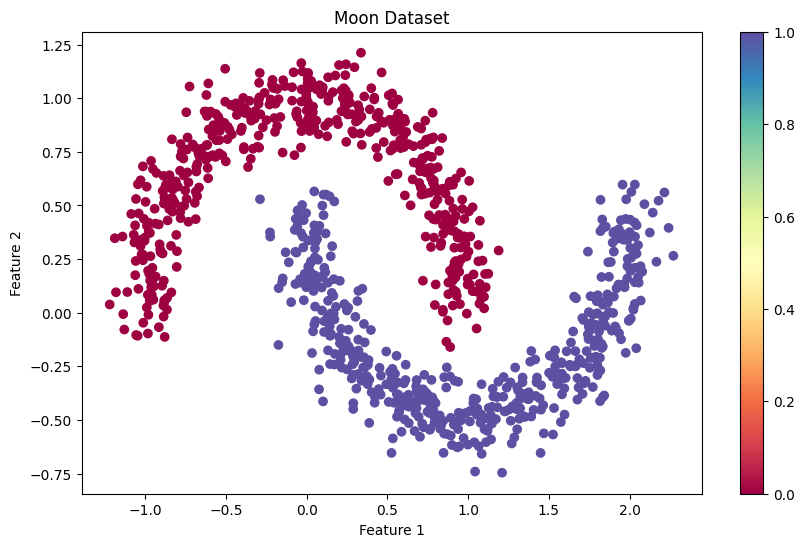

In [ ]:
# For reproducibility
np.random.seed(42)
# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

In [ ]:
# set hyperparameters
hidden_size = 100
learning_rate = 0.3
epochs = 3100

# Create a neural network
nn = NeuralNetwork(input_size=2, hidden_size=hidden_size, output_size=1)

# Train the network
losses = nn.train(X_train, y_train, learning_rate=learning_rate, epochs=epochs, print_every=round(epochs/10))

Epoch 0, Loss: 0.6932
Epoch 310, Loss: 0.2522
Epoch 620, Loss: 0.2420
Epoch 930, Loss: 0.2175
Epoch 1240, Loss: 0.1591
Epoch 1550, Loss: 0.0706
Epoch 1860, Loss: 0.0327
Epoch 2170, Loss: 0.0209
Epoch 2480, Loss: 0.0154
Epoch 2790, Loss: 0.0124


In [ ]:
# Make predictions on test set
y_pred = nn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 1.0000


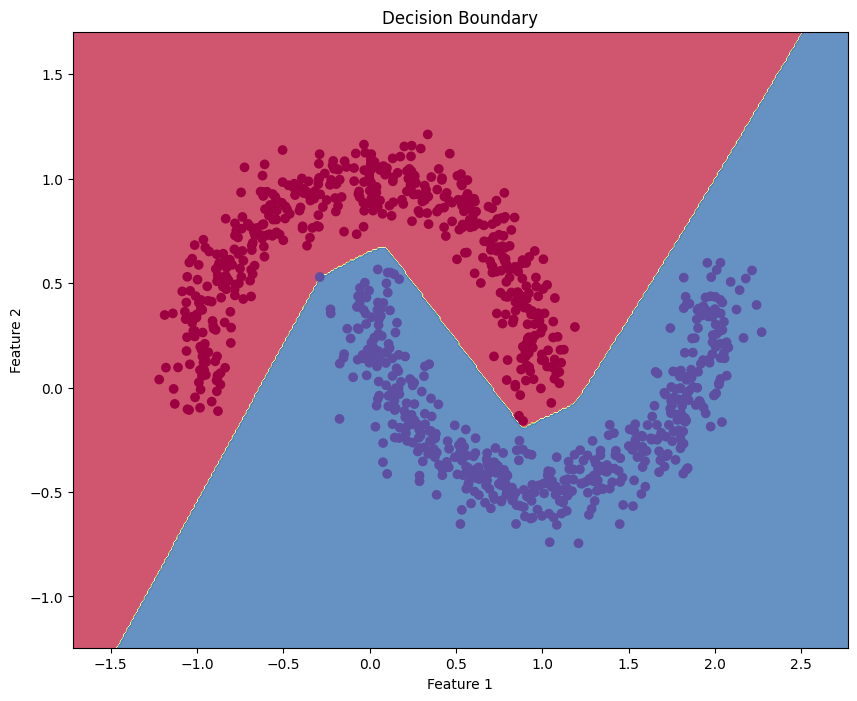

In [ ]:
def plot_decision_boundary(X, y, model):
    """Plot the decision boundary of the trained model"""
    # Set min and max values with some margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Generate a grid of points
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, nn)